In [1]:
import pandas as pd

data = pd.read_csv('video_game.csv')

In [2]:
corr_matrix = data.corr()
corr_matrix 

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,0.175339
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.246429
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.283360
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.075638
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.238982
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
#Dropped due to many error I will get in especially the categorical since there are many variable in
dropped = ['Year_of_Release', 'Developer', 'Rating',
           'Publisher', 'User_Score', 'Name', 'Platform',
           'Genre'] 

#Rating does not effect as much on the data
#Remove the rows later

X = data.drop(dropped, axis=1)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      16719 non-null  float64
 1   EU_Sales      16719 non-null  float64
 2   JP_Sales      16719 non-null  float64
 3   Other_Sales   16719 non-null  float64
 4   Global_Sales  16719 non-null  float64
 5   Critic_Score  8137 non-null   float64
 6   Critic_Count  8137 non-null   float64
 7   User_Count    7590 non-null   float64
dtypes: float64(8)
memory usage: 1.0 MB


In [9]:
X.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [9]:
corr_matrix = X.corr()
corr_matrix 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
NA_Sales,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.246429
EU_Sales,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.283360
JP_Sales,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.075638
Other_Sales,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.238982
Global_Sales,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.265012
Critic_Score,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,1.000000


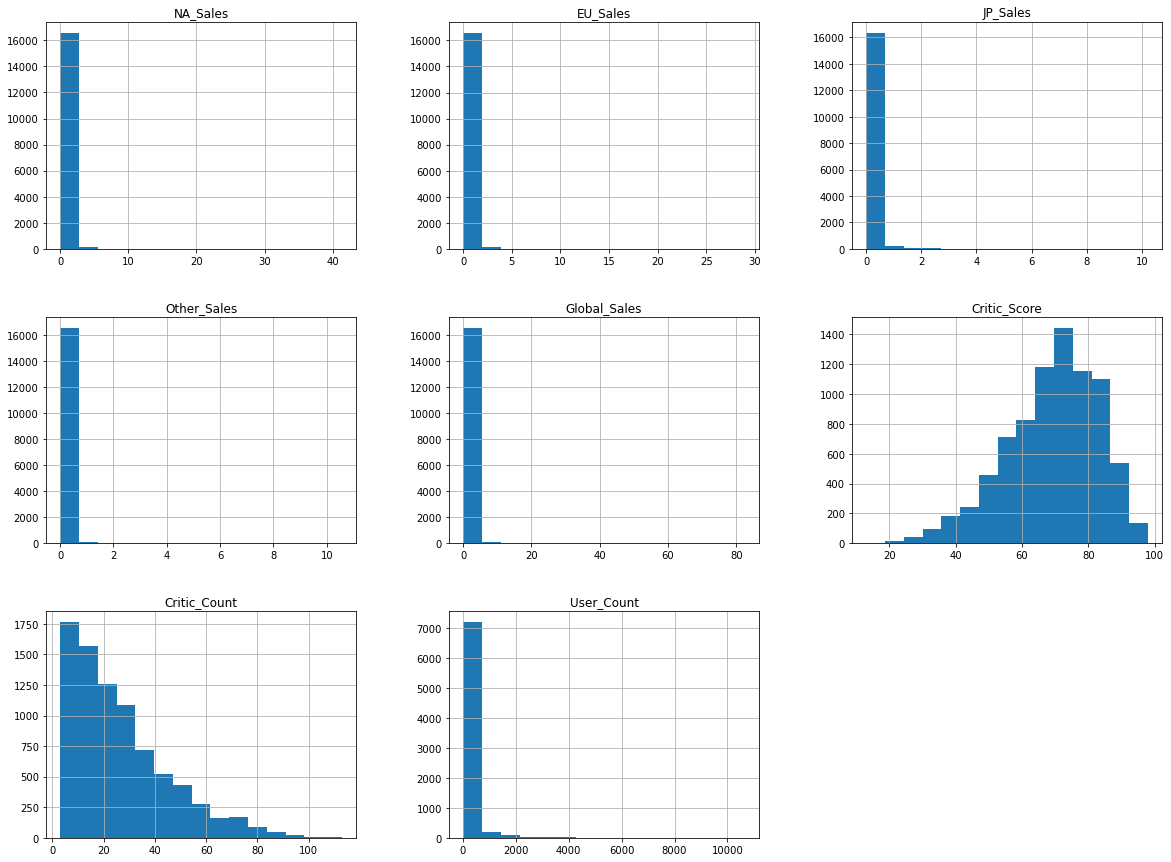

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
X.hist(bins=15, figsize=(20,15))
plt.show()

array([[<AxesSubplot:xlabel='Critic_Count', ylabel='Critic_Count'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='Critic_Count'>,
        <AxesSubplot:xlabel='Global_Sales', ylabel='Critic_Count'>,
        <AxesSubplot:xlabel='Other_Sales', ylabel='Critic_Count'>,
        <AxesSubplot:xlabel='User_Count', ylabel='Critic_Count'>],
       [<AxesSubplot:xlabel='Critic_Count', ylabel='Critic_Score'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='Critic_Score'>,
        <AxesSubplot:xlabel='Global_Sales', ylabel='Critic_Score'>,
        <AxesSubplot:xlabel='Other_Sales', ylabel='Critic_Score'>,
        <AxesSubplot:xlabel='User_Count', ylabel='Critic_Score'>],
       [<AxesSubplot:xlabel='Critic_Count', ylabel='Global_Sales'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>,
        <AxesSubplot:xlabel='Global_Sales', ylabel='Global_Sales'>,
        <AxesSubplot:xlabel='Other_Sales', ylabel='Global_Sales'>,
        <AxesSubplot:xlabel='User_Count', ylabel='Glo

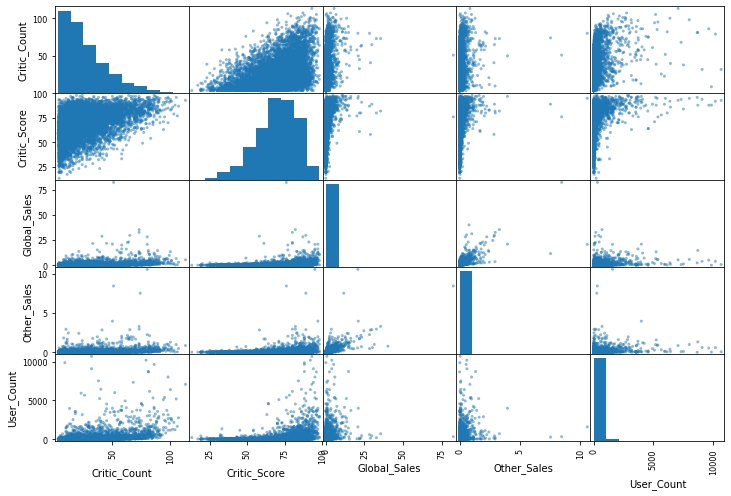

In [114]:
from pandas.plotting import scatter_matrix

only_some_features = ['Critic_Count', 'Critic_Score', 'Global_Sales', 'Other_Sales',
                     'User_Count']
scatter_matrix(X[only_some_features], figsize=(12,8))

<AxesSubplot:>

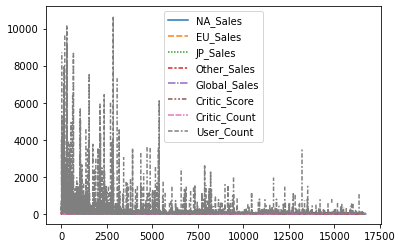

In [11]:
import seaborn as sns

sns.lineplot(data=X)

<AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>

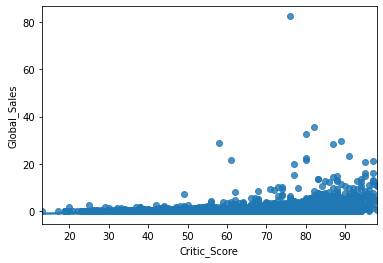

In [12]:
sns.regplot(x=X['Critic_Score'], y=X['Global_Sales'])

<AxesSubplot:xlabel='Global_Sales', ylabel='Critic_Score'>

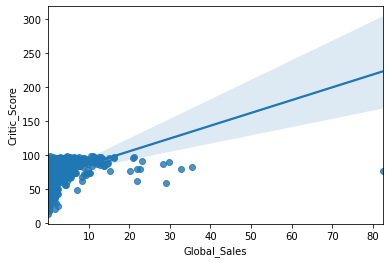

In [13]:
sns.regplot(data=X, x="Global_Sales", y="Critic_Score")

<AxesSubplot:>

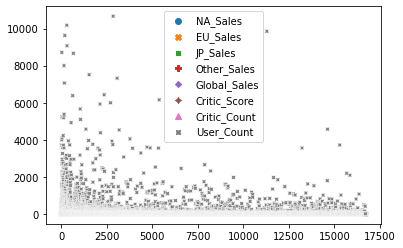

In [14]:
sns.scatterplot(data=X)

In [20]:
y = X['Global_Sales'].copy()
X_full = X.drop('Global_Sales', axis=1)

num = X_full.select_dtypes(exclude='object')
cat = X_full.select_dtypes(exclude=('float64', 'int64'))

print(X_full.shape)
print(y.shape)
print('Input data for   numerical: ', list(num))
print('Input data for categorical: ', list(cat))

(16719, 7)
(16719,)
Input data for   numerical:  ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Count']
Input data for categorical:  []


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=.25, 
                                                    random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12539, 7)
(4180, 7)
(12539,)
(4180,)


In [22]:
from sklearn.impute import SimpleImputer as SI
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [23]:
num_attribs = list(num)
cat_attribs = list(cat)

num_pipeline = Pipeline([
    ('imputer', SI(strategy="median")),
    ('std_scaler', StandardScaler())
])

#With Rating but not really necessary for the full_pipeline
#With Rating feature, removing the missing row is invalid this is due to how the data is structure
cat_pipeline = Pipeline([
    ('imputer', SI(strategy="constant", fill_value='missing')),
    ('std_scaler', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

train_prepared = full_pipeline.fit_transform(X_train)
test_prepared = full_pipeline.fit_transform(X_test)

In [24]:
#Creating a RMSE function to process all the RMSE calculation
from sklearn.metrics import mean_squared_error as mse
import numpy as np

#Simply takes two parameter in the function rmse_cal: 
#                         prediction (model's prediction), target (data comparing to 'Life Expentancy')
def rmse_cal(prediction, target):
    lin_mse = mse(prediction, target)
    lin_mse = np.sqrt(lin_mse)
    return lin_mse

### Linear Regressions Model

In [80]:
#Creating a LinearRegression Model with train_set
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, y_train)

LinearRegression()

### Polynomial Regressions Model

In [78]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
X2_prepared = poly_2.fit_transform(train_prepared)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X2_prepared, y_train)

LinearRegression()

In [79]:
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
X3_prepared = poly_3.fit_transform(train_prepared)

lin_reg_3 = LinearRegression()
lin_reg_3.fit(X3_prepared, y_train)

LinearRegression()

### Decision Tree/RandomForest Models

In [27]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=0, max_depth=7,
                            min_samples_split=3)

DTR.fit(train_prepared, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=3, random_state=0)

In [28]:
from sklearn.ensemble import RandomForestRegressor as RFR

RFR = RFR(random_state=0, n_estimators=30, max_depth=5, max_features=3)
RFR.fit(train_prepared, y_train)

RandomForestRegressor(max_depth=5, max_features=3, n_estimators=30,
                      random_state=0)

### SVM Model

In [21]:
from sklearn.svm import LinearSVR

#Have to change depending on the degree of linear
#Lin_reg -- kernal=default is linear
svm_reg = LinearSVR(epsilon=1.5, random_state=0, max_iter=100)
svm_reg.fit(train_prepared, y_train)

C:\Users\khant\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(epsilon=1.5, max_iter=100, random_state=0)

In [22]:
from sklearn.svm import SVR

svm_reg_poly = SVR(kernel='poly', degree=2,
                         epsilon=1.5, C=100, max_iter=100)
svm_reg_poly.fit(train_prepared, y_train)

C:\Users\khant\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVR(C=100, degree=2, epsilon=1.5, kernel='poly', max_iter=100)

### Gradient Boosting Model

In [23]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

gbr = GBR(max_depth=2, n_estimators=3, learning_rate=1.0)
gbr.fit(train_prepared, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

## Train_Preds/RMSE Calc

### Gradient BM Predicts

In [24]:
gbr_pred = gbr.predict(train_prepared)
gbrT_pred = gbr.predict(test_prepared)

print("RMSE value for GBM train model: ", rmse_cal(gbr_pred, y_train))
print("RMSE value for GBM test  model: ", rmse_cal(gbrT_pred, y_test))

RMSE value for GBM train model:  0.471599773550197
RMSE value for GBM test  model:  0.9646591515962617


### SVM Preds

In [25]:
#When small data under 500
SVM_pred = svm_reg.predict(train_prepared)
SVMT_pred = svm_reg.predict(test_prepared)

print("RMSE value for SVM train model: ", rmse_cal(SVM_pred, y_train))
print("RMSE value for SVM test  model: ", rmse_cal(SVMT_pred, y_test))

SVMP_pred = svm_reg_poly.predict(train_prepared)
SVMPT_pred = svm_reg_poly.predict(test_prepared)

print("RMSE value for SVMP train model: ", rmse_cal(SVMP_pred, y_train))
print("RMSE value for SVMP test  model: ", rmse_cal(SVMPT_pred, y_test))

RMSE value for SVM train model:  0.506890702134812
RMSE value for SVM test  model:  0.6478689539481373
RMSE value for SVMP train model:  8.927909907447972
RMSE value for SVMP test  model:  9.584589898047303


### Tree Preds

In [76]:
DTR_pred = DTR.predict(train_prepared)
DTRT_pred = DTR.predict(test_prepared)

print("RMSE value for DTR train model: ", rmse_cal(DTR_pred, y_train))
print("RMSE value for DTR test  model: ", rmse_cal(DTRT_pred, y_test))

RFR_pred = RFR.predict(train_prepared)
RFRT_pred = RFR.predict(test_prepared)

print("RMSE value for RFR train model: ", rmse_cal(RFR_pred, y_train))
print("RMSE value for RFR test  model: ", rmse_cal(RFRT_pred, y_test))

RMSE value for DTR train model:  0.1441153940942717
RMSE value for DTR test  model:  0.7458009825768659
RMSE value for RFR train model:  0.2041198951442898
RMSE value for RFR test  model:  0.8471729237897432


In [32]:
from sklearn.model_selection import GridSearchCV

#Checking the grid to see which parameter best fit the results or gives
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(RFR, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_searchT = GridSearchCV(RFR, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(train_prepared, y_train)
grid_searchT.fit(test_prepared, y_test)

C:\Users\khant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\khant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khant\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\khant\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\khant\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\khant\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\khant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\khant\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\khant\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\khant\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\khant\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\khant\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, max_features=3,
                                             n_estimators=30, random_state=0),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
#Gives result of what is the best parameters for RandomForestRegressor
print(grid_search.best_params_)

#Same as giving param but tells what model it is using
print(grid_search.best_estimator_)

{'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
RandomForestRegressor(bootstrap=False, max_depth=5, max_features=3,
                      n_estimators=10, random_state=0)


In [34]:
#Gives result of what is the best parameters for RandomForestRegressor
print(grid_searchT.best_params_)

#Same as giving param but tells what model it is using
print(grid_searchT.best_estimator_)

{'max_features': 6, 'n_estimators': 30}
RandomForestRegressor(max_depth=5, max_features=6, n_estimators=30,
                      random_state=0)


### Linear Models

In [35]:
#Predicting for degree 1/2/3 for train_set
X_train_predict = lin_reg.predict(train_prepared)
X2_train_predict = lin_reg_2.predict(X2_prepared)
X3_train_predict = lin_reg_3.predict(X3_prepared)

In [36]:
#Preparing degree 2/3 for test_set
X2_test_prepared = poly_2.fit_transform(test_prepared)
X3_test_prepared = poly_3.fit_transform(test_prepared)

#Predicting degree 1/2/3 on the test_set using trained model
X_test_predict = lin_reg.predict(test_prepared)
X2_test_predict = lin_reg_2.predict(X2_test_prepared)
X3_test_predict = lin_reg_3.predict(X3_test_prepared)

In [37]:
print("TRAIN MODEL DATA")
print("RMSE value for lin_reg  train model: ", rmse_cal(X_train_predict, y_train))
print("RMSE value for degree 2 train model: ", rmse_cal(X2_train_predict, y_train))
print("RMSE value for degree 3 train model:  ",rmse_cal(X3_train_predict, y_train))

#There isn't seem to have overfitting in value wise
print("TEST MODEL DATA")
print("RMSE value for lin_reg  test model:  ",rmse_cal(X_test_predict, y_test))
print("RMSE value for degree 2 test model: ", rmse_cal(X2_test_predict, y_test))
print("RMSE value for degree 3 test model:  ",rmse_cal(X3_test_predict, y_test))

TRAIN MODEL DATA
RMSE value for lin_reg  train model:  0.005199519734258385
RMSE value for degree 2 train model:  0.005183444663926003
RMSE value for degree 3 train model:   0.005152836197385968
TEST MODEL DATA
RMSE value for lin_reg  test model:   0.3531026922347941
RMSE value for degree 2 test model:  0.35286516448084687
RMSE value for degree 3 test model:   0.3729369463222099


### Checking Overfitting

In [38]:
#Definitely overfitting in value
def overfitcheck(train_val, test_val):
    difference = test_val - train_val
    time_diff = test_val/train_val
    return difference, time_diff

#Theory wise the difference in value is a good measure of overfitting
#However due to how small of a value it is, the data is most likely not overfitting
#Thus model is well train

print("Difference in value,  Difference in #")

print(overfitcheck(rmse_cal(X_train_predict, y_train),rmse_cal(X_test_predict, y_test)))
print(overfitcheck(rmse_cal(X2_train_predict, y_train),rmse_cal(X2_test_predict, y_test)))
print(overfitcheck(rmse_cal(X3_train_predict, y_train),rmse_cal(X3_test_predict, y_test)))

Difference in value,  Difference in #
(0.34790317250053576, 67.91063603591797)
(0.34768171981692086, 68.07541844453348)
(0.3677841101248239, 72.37508277701525)


In [115]:
#Trade of RFR and DTR
print("Difference in value,  Difference in #")
print(overfitcheck(rmse_cal(DTR_pred, y_train),rmse_cal(DTRT_pred, y_test)))
print(overfitcheck(rmse_cal(RFR_pred, y_train),rmse_cal(RFRT_pred, y_test)))

Difference in value,  Difference in #
(0.6016855884825942, 5.175026493623625)
(0.6430530286454534, 4.150369189592652)


# Overfitting

### Ridge

In [39]:
#Ridge
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=.5, solver="cholesky")
ridge_reg.fit(train_prepared, y_train)

Ridge(alpha=0.5, solver='cholesky')

In [40]:
ridge2_reg = Ridge(alpha=.5, solver="cholesky")
ridge2_reg.fit(X2_prepared, y_train)

Ridge(alpha=0.5, solver='cholesky')

In [41]:
ridge3_reg = Ridge(alpha=.5, solver="cholesky")
ridge3_reg.fit(X3_prepared, y_train)

Ridge(alpha=0.5, solver='cholesky')

In [42]:
lin_R_pred = ridge_reg.predict(train_prepared)
lin_R_predT = ridge_reg.predict(test_prepared)
print("RMSE Ridge train  lin: ",rmse_cal(lin_R_pred, y_train))
print("RMSE Ridge test   lin: ",rmse_cal(lin_R_predT, y_test))

#2nd Degree Right Poly
lin_R2_pred = ridge2_reg.predict(X2_prepared)
lin_R2_predT = ridge2_reg.predict(X2_test_prepared)
print("RMSE Ridge2 train lin: ",rmse_cal(lin_R2_pred, y_train))
print("RMSE Ridge2 test  lin: ",rmse_cal(lin_R2_predT, y_test))

#3rd Degree Right Poly
lin_R3_pred = ridge3_reg.predict(X3_prepared)
lin_R3_predT = ridge3_reg.predict(X3_test_prepared)
print("RMSE Ridge3 train lin: ",rmse_cal(lin_R3_pred, y_train))
print("RMSE Ridge3 test  lin: ",rmse_cal(lin_R3_predT, y_test))

RMSE Ridge train  lin:  0.005199627546591842
RMSE Ridge test   lin:  0.35312866509551355
RMSE Ridge2 train lin:  0.005183941723174322
RMSE Ridge2 test  lin:  0.35277757877070853
RMSE Ridge3 train lin:  0.005154272153664064
RMSE Ridge3 test  lin:  0.3770812398197687


### Lasso

In [50]:
#Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=.3)
lasso_reg.fit(train_prepared, y_train)

Lasso(alpha=0.3)

In [51]:
lasso2_reg = Lasso(alpha=.3)
lasso2_reg.fit(X2_prepared, y_train)

Lasso(alpha=0.3)

In [52]:
lasso3_reg = Lasso(alpha=.3)
lasso3_reg.fit(X3_prepared, y_train)

C:\Users\khant\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.731172728548245, tolerance: 2.5427790452460326
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.3)

In [53]:
lin_L_pred = lasso_reg.predict(train_prepared)
lin_L_predT = lasso_reg.predict(test_prepared)
print("RMSE Lasso train  lin: ",rmse_cal(lin_L_pred, y_train))
print("RMSE Lasso test   lin: ",rmse_cal(lin_L_predT, y_test))

lin_L2_pred = lasso2_reg.predict(X2_prepared)
lin_L2_predT = lasso2_reg.predict(X2_test_prepared)
print("RMSE Lasso2 train lin: ",rmse_cal(lin_L2_pred, y_train))
print("RMSE Lasso2 test  lin: ",rmse_cal(lin_L2_predT, y_test))

lin_L3_pred = lasso3_reg.predict(X3_prepared)
lin_L3_predT = lasso3_reg.predict(X3_test_prepared)
print("RMSE Lasso3 train lin: ",rmse_cal(lin_L3_pred, y_train))
print("RMSE Lasso3 test  lin: ",rmse_cal(lin_L3_predT, y_test))

RMSE Lasso train  lin:  0.3877090989546516
RMSE Lasso test   lin:  0.7515789597208592
RMSE Lasso2 train lin:  0.5636910170555955
RMSE Lasso2 test  lin:  1.0100098523452739
RMSE Lasso3 train lin:  0.5316138623136998
RMSE Lasso3 test  lin:  3.214209174526512


### Elastic Net

In [54]:
#Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=.1, l1_ratio=0.5)
elastic_net.fit(train_prepared, y_train)

ElasticNet(alpha=0.1)

In [55]:
elastic2_net = ElasticNet(alpha=.1, l1_ratio=0.5)
elastic2_net.fit(X2_prepared, y_train)

ElasticNet(alpha=0.1)

In [56]:
elastic3_net = ElasticNet(alpha=.1, l1_ratio=0.5)
elastic3_net.fit(X3_prepared, y_train)

C:\Users\khant\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376.1608788177407, tolerance: 2.5427790452460326
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.1)

In [57]:
lin_E_pred = elastic_net.predict(train_prepared)
lin_E_predT = elastic_net.predict(test_prepared)
print("RMSE EN train  lin: ",rmse_cal(lin_E_pred, y_train))
print("RMSE EN test   lin: ",rmse_cal(lin_E_predT, y_test))

lin_E2_pred = elastic2_net.predict(X2_prepared)
lin_E2_predT = elastic2_net.predict(X2_test_prepared)
print("RMSE EN2 train lin: ",rmse_cal(lin_E2_pred, y_train))
print("RMSE EN2 test  lin: ",rmse_cal(lin_E2_predT, y_test))

lin_E3_pred = elastic3_net.predict(X3_prepared)
lin_E3_predT = elastic3_net.predict(X3_test_prepared)
print("RMSE EN3 train lin: ",rmse_cal(lin_E3_pred, y_train))
print("RMSE EN3 test  lin: ",rmse_cal(lin_E3_predT, y_test))

RMSE EN train  lin:  0.09157759860054186
RMSE EN test   lin:  0.4455848645723512
RMSE EN2 train lin:  0.15684259013937232
RMSE EN2 test  lin:  0.3795863646216384
RMSE EN3 train lin:  0.19920072397373492
RMSE EN3 test  lin:  1.6197125774747891


Trade of between test and train for overfitting

In [78]:
#Ridge
print("RIDGE")
print("Difference in value,  Difference in #")
print(overfitcheck(rmse_cal(lin_R_pred, y_train),rmse_cal(lin_R_predT, y_test)))
print(overfitcheck(rmse_cal(lin_R2_pred, y_train),rmse_cal(lin_R2_predT, y_test)))
print(overfitcheck(rmse_cal(lin_R3_pred, y_train),rmse_cal(lin_R3_predT, y_test)))
print('-'*40)

#Lasso
print("LASSO")
print("Difference in value,  Difference in #")
print(overfitcheck(rmse_cal(lin_L_pred, y_train),rmse_cal(lin_L_predT, y_test)))
print(overfitcheck(rmse_cal(lin_L2_pred, y_train),rmse_cal(lin_L2_predT, y_test)))
print(overfitcheck(rmse_cal(lin_L3_pred, y_train),rmse_cal(lin_L3_predT, y_test)))
print('-'*40)
#Elastic Net
print("Elastic Net")
print("Difference in value,  Difference in #")
print(overfitcheck(rmse_cal(lin_E_pred, y_train),rmse_cal(lin_E_predT, y_test)))
print(overfitcheck(rmse_cal(lin_E2_pred, y_train),rmse_cal(lin_E2_predT, y_test)))
print(overfitcheck(rmse_cal(lin_E3_pred, y_train),rmse_cal(lin_E3_predT, y_test)))

RIDGE
Difference in value,  Difference in #
(0.3479290375489217, 67.91422307295375)
(0.3475936370475342, 68.0519954909311)
(0.37192696766610467, 73.15896960382847)
----------------------------------------
LASSO
Difference in value,  Difference in #
(0.3638698607662076, 1.938512564567817)
(0.4463188352896783, 1.7917792226333438)
(2.682595312212812, 6.046134990794955)
----------------------------------------
Elastic Net
Difference in value,  Difference in #
(0.3540072659718093, 4.865653515506298)
(0.2227437744822661, 2.420174037449478)
(1.4205118535010541, 8.13105768475195)


### Cross_Val_Scores/Accuracy

In [89]:
from sklearn.model_selection import cross_val_score
#Not need for more information but can be used to extract more
def display_cross(model, output, label, cv=5,  scoring="neg_mean_squared_error"):
    scores = cross_val_score(model, output, label, cv=cv, scoring=scoring)
    forest_rmse_scores = np.sqrt(-scores)
    return forest_rmse_scores
    
#DTR score checker
print('DTR Model')
print(display_cross(DTR, train_prepared, y_train))
print(display_cross(DTR, test_prepared, y_test))
print('-'*45)

print('RFR Model')
print(display_cross(RFR, train_prepared, y_train))
print(display_cross(RFR, test_prepared, y_test))
print('-'*45)

print('Linear Model')
print(display_cross(lin_reg, train_prepared, y_train))
print(display_cross(lin_reg, test_prepared, y_test))
print('-'*45)

print('2nd D Model')
print(display_cross(lin_reg_2, X2_prepared, y_train))
print(display_cross(lin_reg_2, X2_test_prepared, y_test))
print('-'*45)

print('3rd D Model')
print(display_cross(lin_reg_3, X3_prepared, y_train))
print(display_cross(lin_reg_3, X3_test_prepared, y_test))

DTR Model
[0.37365265 0.27656035 0.34114149 0.39071078 0.56082969]
[0.54558635 0.23464472 0.82385659 1.83000443 0.23585246]
---------------------------------------------
RFR Model
[0.2502342  0.19547046 0.2924794  0.25439587 0.6195322 ]
[0.43168411 0.23933846 0.33294771 1.94533932 0.16508102]
---------------------------------------------
Linear Model
[0.00512005 0.00532527 0.00520611 0.00526533 0.00510795]
[0.00520676 0.00501743 0.00547245 0.00539624 0.005075  ]
---------------------------------------------
2nd D Model
[0.00512746 0.00534571 0.00521142 0.00531731 0.00533314]
[0.00526482 0.0051073  0.00550315 0.0074867  0.00512766]
---------------------------------------------
3rd D Model
[0.07192592 0.00561326 0.00594823 0.00687772 0.02973789]
[0.03386921 0.00627939 0.01188008 0.40495795 0.00593055]


In [98]:
def display_acc(model, output, label, cv=5):
    scores = cross_val_score(model, output, label, cv=cv)
    return scores

#Accuracy of eacy_acc
print('DTR Model')
print(display_acc(DTR, train_prepared, y_train))
print(display_acc(DTR, test_prepared, y_test))
print('-'*45)

print('RFR Model')
print(display_acc(RFR, train_prepared, y_train))
print(display_acc(RFR, test_prepared, y_test))
print('-'*45)

print('Linear Model')
print(display_acc(lin_reg, train_prepared, y_train))
print(display_acc(lin_reg, test_prepared, y_test))
print('-'*45)

print('2nd D Model')
print(display_acc(lin_reg_2, X2_prepared, y_train))
print(display_acc(lin_reg_2, X2_test_prepared, y_test))
print('-'*45)

print('3rd D Model')
print(display_acc(lin_reg_3, X3_prepared, y_train))
print(display_acc(lin_reg_3, X3_test_prepared, y_test))

DTR Model
[0.92021111 0.96048078 0.92873743 0.92698046 0.88477174]
[0.90107542 0.94023909 0.75705919 0.65740836 0.94335886]
---------------------------------------------
RFR Model
[0.96421512 0.98025802 0.94761789 0.96904374 0.85938723]
[0.93806882 0.93782432 0.96032204 0.61286431 0.97225112]
---------------------------------------------
Linear Model
[0.99998502 0.99998535 0.9999834  0.99998674 0.99999044]
[0.99999099 0.99997268 0.99998928 0.99999702 0.99997377]
---------------------------------------------
2nd D Model
[0.99998498 0.99998523 0.99998337 0.99998648 0.99998958]
[0.99999079 0.99997169 0.99998916 0.99999427 0.99997323]
---------------------------------------------
3rd D Model
[0.9970435  0.99998372 0.99997833 0.99997737 0.99967602]
[0.99961877 0.9999572  0.99994948 0.98322385 0.99996419]


In [104]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())
    
#Accuracy of eacy_acc
print('DTR Model')
display_scores(display_acc(DTR, train_prepared, y_train))
display_scores(display_acc(DTR, test_prepared, y_test))
print('-'*45)

print('RFR Model')
display_scores(display_acc(RFR, train_prepared, y_train))
display_scores(display_acc(RFR, test_prepared, y_test))
print('-'*45)

print('Linear Model')
display_scores(display_acc(lin_reg, train_prepared, y_train))
display_scores(display_acc(lin_reg, test_prepared, y_test))
print('-'*45)

print('2nd D Model')
display_scores(display_acc(lin_reg_2, X2_prepared, y_train))
display_scores(display_acc(lin_reg_2, X2_test_prepared, y_test))
print('-'*45)

print('3rd D Model')
display_scores(display_acc(lin_reg_3, X3_prepared, y_train))
display_scores(display_acc(lin_reg_3, X3_test_prepared, y_test))

DTR Model
Scores: [0.92021111 0.96048078 0.92873743 0.92698046 0.88477174]
Mean: 0.9242363038670541
Standard Deviation: 0.02414583634043821
Scores: [0.90107542 0.94023909 0.75705919 0.65740836 0.94335886]
Mean: 0.8398281849490381
Standard Deviation: 0.11373642604598255
---------------------------------------------
RFR Model
Scores: [0.96421512 0.98025802 0.94761789 0.96904374 0.85938723]
Mean: 0.9441043992804913
Standard Deviation: 0.0436413567872165
Scores: [0.93806882 0.93782432 0.96032204 0.61286431 0.97225112]
Mean: 0.8842661222607113
Standard Deviation: 0.13634369474687855
---------------------------------------------
Linear Model
Scores: [0.99998502 0.99998535 0.9999834  0.99998674 0.99999044]
Mean: 0.999986189967009
Standard Deviation: 2.3758624968845564e-06
Scores: [0.99999099 0.99997268 0.99998928 0.99999702 0.99997377]
Mean: 0.9999847483906745
Standard Deviation: 9.760237576570275e-06
---------------------------------------------
2nd D Model
Scores: [0.99998498 0.99998523 0.9